In [1]:
import os
%load_ext rpy2.ipython
%matplotlib inline

import pandas as pd
from prophet import Prophet
from matplotlib import pyplot as plt
from prophet.diagnostics import cross_validation, performance_metrics
import itertools
import logging
logger = logging.getLogger('cmdstanpy')
logger.addHandler(logging.NullHandler())
logger.propagate = False
logger.setLevel(logging.CRITICAL)

c:\Users\20416597295\Documents\Santiago\R\.conda\Lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(
Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_excel('C:/Users/20416597295/Documents/Santiago/datos_ficticios - CABA_asd.xlsx')
df

,date_1,date,receptivo_d,receptivo_total,tcrm,pib_pc_global
0,2016-01-01,2016-01-31,248684.0,248684,96.0,15306.282400
1,2016-02-01,2016-02-29,211731.0,211731,102.5,15306.282400
2,2016-03-01,2016-03-31,210862.0,210862,103.0,15306.282400
3,2016-04-01,2016-04-30,182419.0,182419,97.4,15306.282400
4,2016-05-01,2016-05-31,176403.0,176403,91.5,15306.282400
...,...,...,...,...,...,...
104,2024-09-01,2024-09-30,211287.0,211287,86.0,16298.202864
105,2024-10-01,2024-10-31,198780.0,198780,84.0,16298.202864
106,2024-11-01,2024-11-30,252963.0,252963,81.7,16298.202864
107,2024-12-01,2024-12-31,272427.0,272427,79.8,16298.202864


In [3]:
df = df.drop(df.columns[0], axis=1)
df = df.drop(df.columns[1], axis=1)
df

,date,receptivo_total,tcrm,pib_pc_global
0,2016-01-31,248684,96.0,15306.282400
1,2016-02-29,211731,102.5,15306.282400
2,2016-03-31,210862,103.0,15306.282400
3,2016-04-30,182419,97.4,15306.282400
4,2016-05-31,176403,91.5,15306.282400
...,...,...,...,...
104,2024-09-30,211287,86.0,16298.202864
105,2024-10-31,198780,84.0,16298.202864
106,2024-11-30,252963,81.7,16298.202864
107,2024-12-31,272427,79.8,16298.202864


In [4]:
df = df[(df['date'] < '2022-03-01') | (df['date'] > '2022-03-01')]

In [5]:
df.columns = ['ds', 'y', 'tcrm', 'pib_pc_global']
df['ds'] = pd.to_datetime(df['ds'])

In [ ]:
'''
# CROSS CORRELATION

os.environ['CMDSTAN'] = "C:/Anaconda/Anaconda3/envs/test_conda_env/Library/bin/cmdstan"

# Definir los hiperparámetros a probar
seasonality_modes = ['additive']
changepoint_prior_scales = [0.05, 0.15, 0.3]
changepoint_ranges = [0.8, 0.85, 0.9]
pandemic_windows = [0, 2]  # Ventana de efecto de pandemia
use_regressors = [True, False]  # Si se usan o no los regresores

semana_santa = pd.DataFrame({
    'holiday': 'semana_santa',
    'ds': pd.to_datetime(
    list(pd.date_range('2016-03-20', '2016-03-27'))
    + list(pd.date_range('2017-04-9', '2017-04-16'))
    + list(pd.date_range('2018-03-25', '2018-04-1'))
    + list(pd.date_range('2019-03-14', '2021-03-21'))
    + list(pd.date_range('2020-04-5', '2020-04-12'))
    + list(pd.date_range('2021-03-28', '2021-04-04'))
    + list(pd.date_range('2022-04-10', '2022-04-17'))
    + list(pd.date_range('2023-04-02', '2023-04-09'))
    + list(pd.date_range('2024-03-24', '2024-03-31'))
    + list(pd.date_range('2025-04-13', '2025-04-20'))
    ),
})

# Crear combinaciones de hiperparámetros
param_grid = list(itertools.product(
    seasonality_modes, changepoint_prior_scales, changepoint_ranges, pandemic_windows, use_regressors
))

# DataFrame para almacenar los resultados
results = []

for params in param_grid:
    seasonality_mode, cps, cpr, pandemic_window, use_regr = params

    # Definir las fechas de la pandemia con diferente ventana
    pandemic = pd.DataFrame({
        'holiday': 'pandemic',
        'ds': pd.date_range('2020-03-01', '2022-03-01'),
        'lower_window': -2,
        'upper_window': pandemic_window,
    })

    # Combinar Semana Santa y Pandemia
    holidays = pd.concat([semana_santa, pandemic])

    # Crear modelo Prophet
    m = Prophet(
        seasonality_mode=seasonality_mode,
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=False,
        holidays=holidays,
        changepoint_prior_scale=cps,
        changepoint_range=cpr
    )

    # Agregar regresores si corresponde
    if use_regr:
        m.add_regressor('tcrm')
        m.add_regressor('pib_pc_global')

    # Ajustar el modelo
    m.fit(df)

    # Realizar validación cruzada con un horizonte de 90 días
    df_cv = cross_validation(m, initial='3196 days', period = '30 days', horizon = '90 days', parallel="processes")
    df_p = performance_metrics(df_cv, metrics=['mae'])

    # Guardar resultados
    results.append((seasonality_mode, cps, cpr, pandemic_window, use_regr, df_p['mae'].values[0]))

# Convertir a DataFrame para análisis
results_df = pd.DataFrame(results, columns=['seasonality_mode', 'cps', 'cpr', 'pandemic_window', 'use_regressors', 'mae'])

# Mostrar los mejores resultados
best_params = results_df.sort_values('mae').head(5)
print(best_params)
'''

SyntaxError: incomplete input (3516973695.py, line 1)

In [11]:
import pandas as pd
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

semana_santa = pd.DataFrame({
    'holiday': 'semana_santa',
    'ds': pd.to_datetime(
    list(pd.date_range('2016-03-20', '2016-03-27'))
    + list(pd.date_range('2017-04-9', '2017-04-16'))
    + list(pd.date_range('2018-03-25', '2018-04-1'))
    + list(pd.date_range('2019-03-14', '2021-03-21'))
    + list(pd.date_range('2020-04-5', '2020-04-12'))
    + list(pd.date_range('2021-03-28', '2021-04-04'))
    + list(pd.date_range('2022-04-10', '2022-04-17'))
    + list(pd.date_range('2023-04-02', '2023-04-09'))
    + list(pd.date_range('2024-03-24', '2024-03-31'))
    + list(pd.date_range('2025-04-13', '2025-04-20'))
    ),
})

# Definir las fechas de la pandemia
pandemic = pd.DataFrame({
    'holiday': 'pandemic',
    'ds': pd.date_range('2020-03-01', '2022-03-01'),
    'lower_window': -2,
    'upper_window': 0,
})

# Combinar ambos efectos en un solo DataFrame
holidays = pd.concat([semana_santa, pandemic])

# Crear el modelo de Prophet con los efectos de eventos
m = Prophet(
    seasonality_mode='additive',
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    holidays=holidays,
    changepoint_range=0.85,
    changepoint_prior_scale = 0.30
)

# Agrego el tipo de cambio real y el pib per cápita global como regresores
m.add_regressor('tcrm')
m.add_regressor('pib_pc_global')

# Ajustar el modelo con los datos históricos
m.fit(df)

# Generar el DataFrame futuro con fechas a predecir
future = m.make_future_dataframe(periods=12, freq='ME')

# Asegurar que 'tcrm' esté en el DataFrame futuro
future = future.merge(df[['ds', 'tcrm','pib_pc_global']], on='ds', how='left') # ,

# Si hay NaN en el TCRM futuro, puedes imputarlos con un supuesto (ejemplo: último valor conocido)
future['tcrm'].fillna(method='ffill', inplace=True)
future['pib_pc_global'].fillna(method='ffill', inplace=True)

# Realizar la predicción
forecast = m.predict(future)


C:\Users\20416597295\AppData\Local\Temp\ipykernel_15088\1087527682.py:57: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  future['tcrm'].fillna(method='ffill', inplace=True)
C:\Users\20416597295\AppData\Local\Temp\ipykernel_15088\1087527682.py:57: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future['tcrm'].fillna(method='ffill', inplace=True)
C:\Users\20416597295\AppData\Local\Temp\ipykernel_15088\1087527682.py:58: FutureWarning: A value is

In [12]:
m.train_holiday_names



0    semana_santa
1        pandemic
dtype: object

In [13]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12).round()

,ds,yhat,yhat_lower,yhat_upper
109,2025-02-28,228409.0,209447.0,247831.0
110,2025-03-31,247333.0,228665.0,265278.0
111,2025-04-30,205979.0,187073.0,223174.0
112,2025-05-31,179235.0,160115.0,198755.0
113,2025-06-30,181570.0,161771.0,200489.0
114,2025-07-31,205976.0,186345.0,226278.0
115,2025-08-31,198870.0,177820.0,219879.0
116,2025-09-30,210883.0,188886.0,233754.0
117,2025-10-31,208373.0,183643.0,233493.0
118,2025-11-30,234829.0,208464.0,262075.0


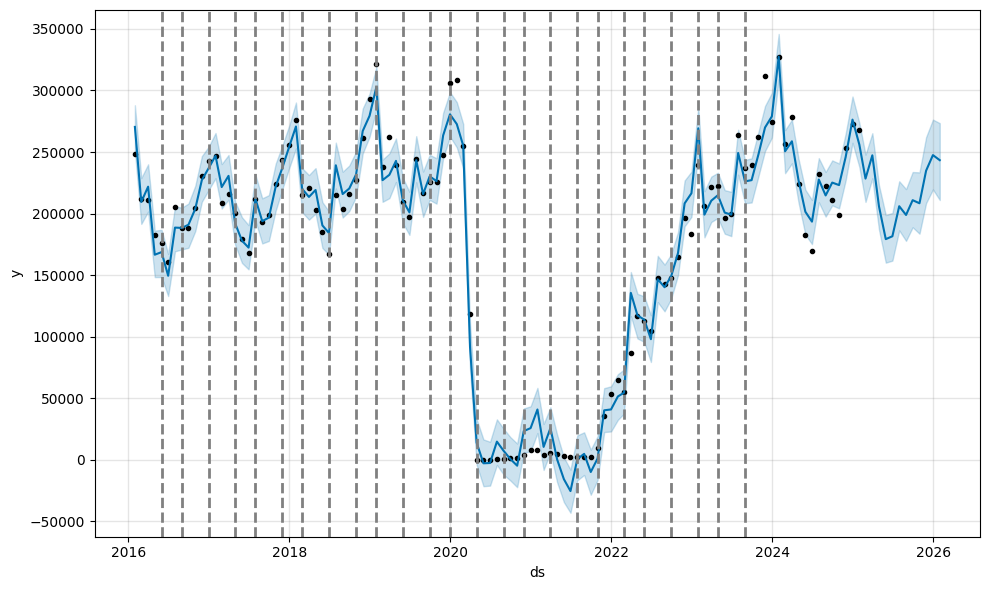

In [14]:
fig1 = m.plot(forecast)
for cp in m.changepoints:
    plt.axvline(cp, c='gray', ls='--', lw=2)

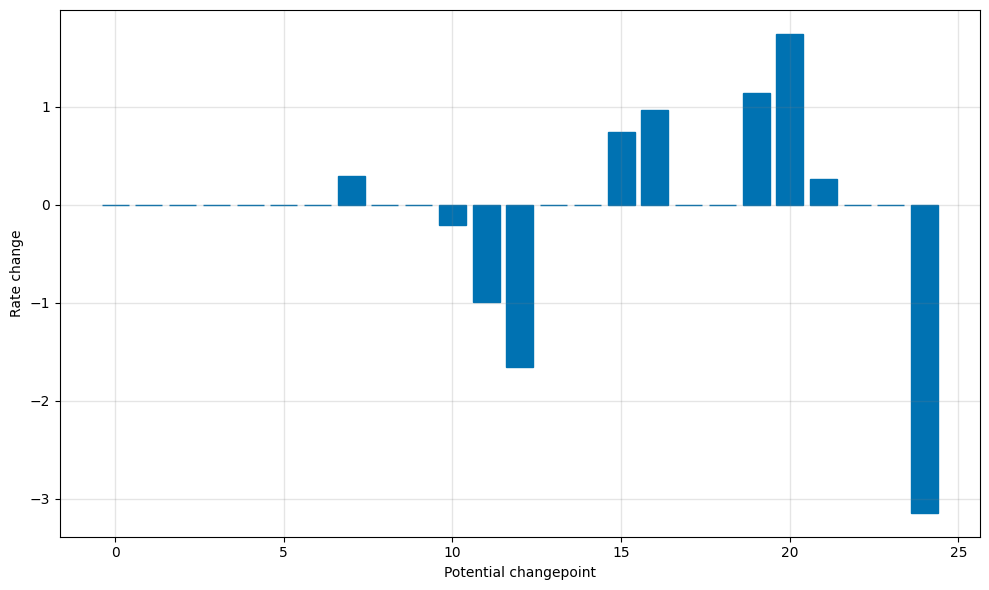

In [15]:
deltas = m.params['delta'].mean(0)
fig = plt.figure(facecolor='w', figsize=(10, 6))
ax = fig.add_subplot(111)
ax.bar(range(len(deltas)), deltas, facecolor='#0072B2', edgecolor='#0072B2')
ax.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
ax.set_ylabel('Rate change')
ax.set_xlabel('Potential changepoint')
fig.tight_layout()

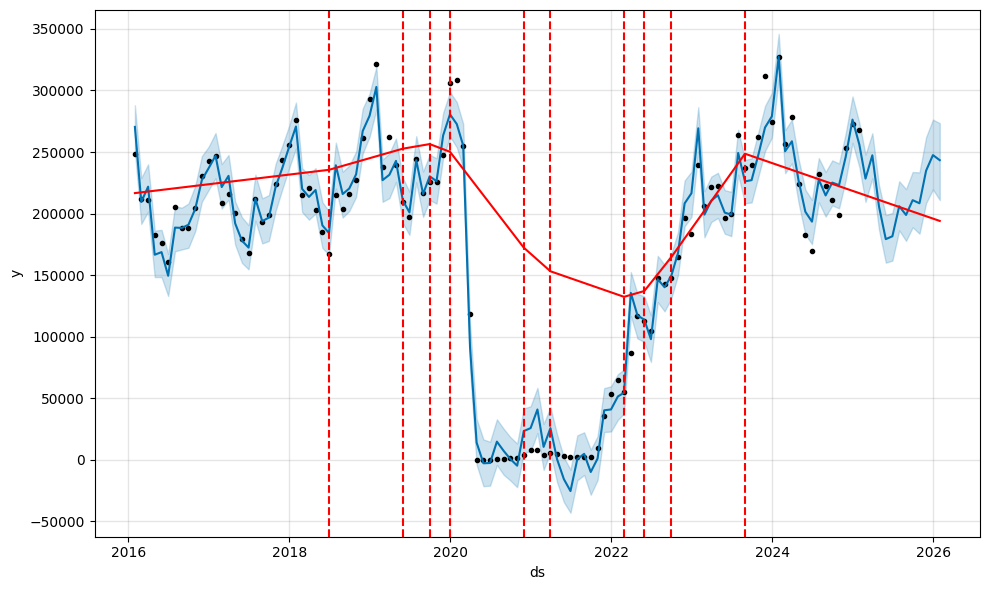

In [16]:

from prophet.plot import add_changepoints_to_plot

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

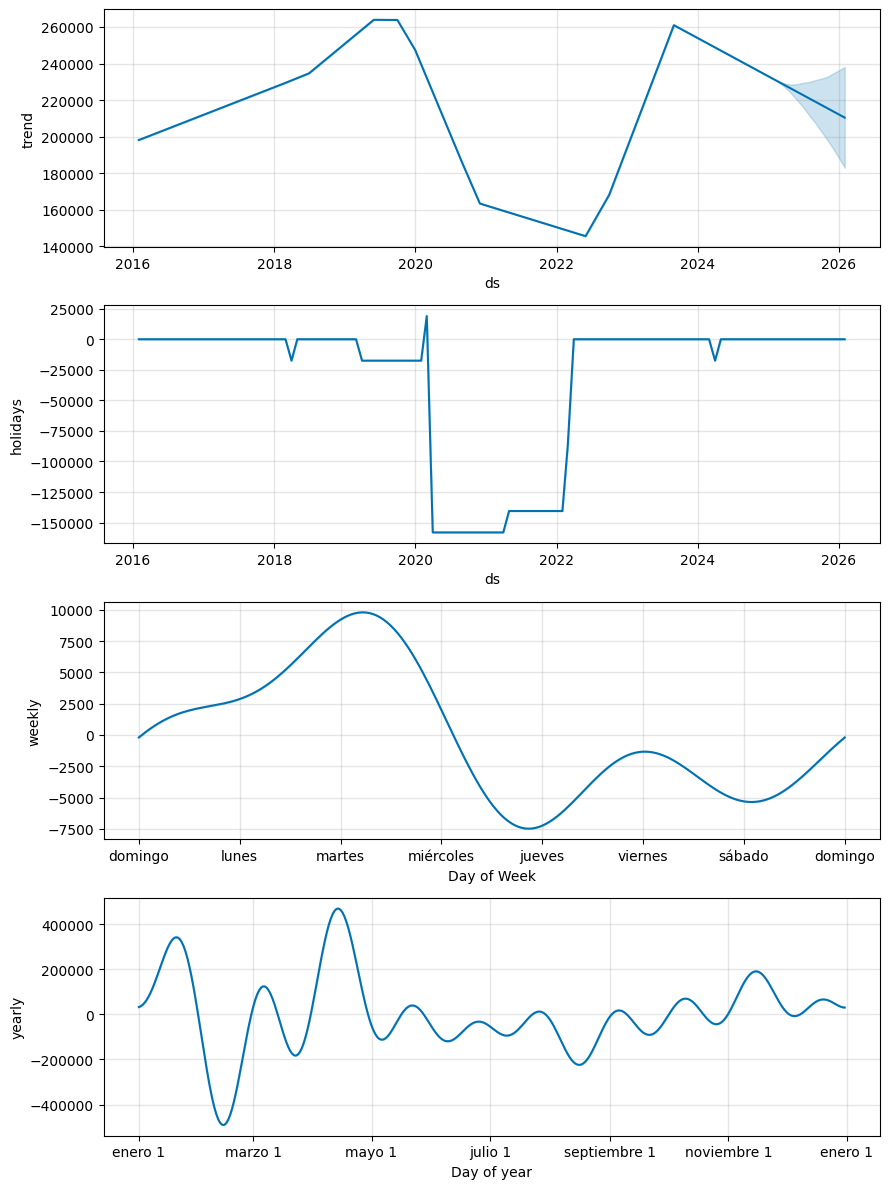

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

NameError: name 'go' is not defined

In [ ]:
plot_components_plotly(m, forecast)